In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [3]:
d=pd.read_csv('general_data.csv')

In [4]:
d.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [5]:
d.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


In [6]:
d.describe(include='object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18
count,4410,4410,4410,4410,4410,4410,4410,4410
unique,2,3,3,6,2,9,3,1
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y
freq,3699,3129,2883,1818,2646,978,2019,4410


In [7]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
Age                        4410 non-null int64
Attrition                  4410 non-null object
BusinessTravel             4410 non-null object
Department                 4410 non-null object
DistanceFromHome           4410 non-null int64
Education                  4410 non-null int64
EducationField             4410 non-null object
EmployeeCount              4410 non-null int64
EmployeeID                 4410 non-null int64
Gender                     4410 non-null object
JobLevel                   4410 non-null int64
JobRole                    4410 non-null object
MaritalStatus              4410 non-null object
MonthlyIncome              4410 non-null int64
NumCompaniesWorked         4391 non-null float64
Over18                     4410 non-null object
PercentSalaryHike          4410 non-null int64
StandardHours              4410 non-null int64
StockOptionLevel           4410 non-n

In [8]:
d.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [9]:
d['NumCompaniesWorked']=d['NumCompaniesWorked'].interpolate()
d['TotalWorkingYears']=d['TotalWorkingYears'].interpolate()

In [10]:
d.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

In [11]:
catd=[i for i in d.columns.values if d[i].dtype=='object']
catd

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18']

In [12]:
catd=d[catd]

In [13]:
catd.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18
0,No,Travel_Rarely,Sales,Life Sciences,Female,Healthcare Representative,Married,Y
1,Yes,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Single,Y
2,No,Travel_Frequently,Research & Development,Other,Male,Sales Executive,Married,Y
3,No,Non-Travel,Research & Development,Life Sciences,Male,Human Resources,Married,Y
4,No,Travel_Rarely,Research & Development,Medical,Male,Sales Executive,Single,Y


In [14]:
numd=d.drop(catd,axis=1)


In [15]:
numd=numd.drop(['EmployeeCount','EmployeeID','StandardHours'],axis=1)
d=d.drop(['EmployeeCount','EmployeeID','StandardHours'],axis=1)

In [16]:
numd.head()

,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,6,2,1,131160,1.0,11,0,1.0,6,1,0,0
1,31,10,1,1,41890,0.0,23,1,6.0,3,5,1,4
2,32,17,4,4,193280,1.0,15,3,5.0,2,5,0,3
3,38,2,5,3,83210,3.0,11,3,13.0,5,8,7,5
4,32,10,1,1,23420,4.0,12,2,9.0,2,6,0,4


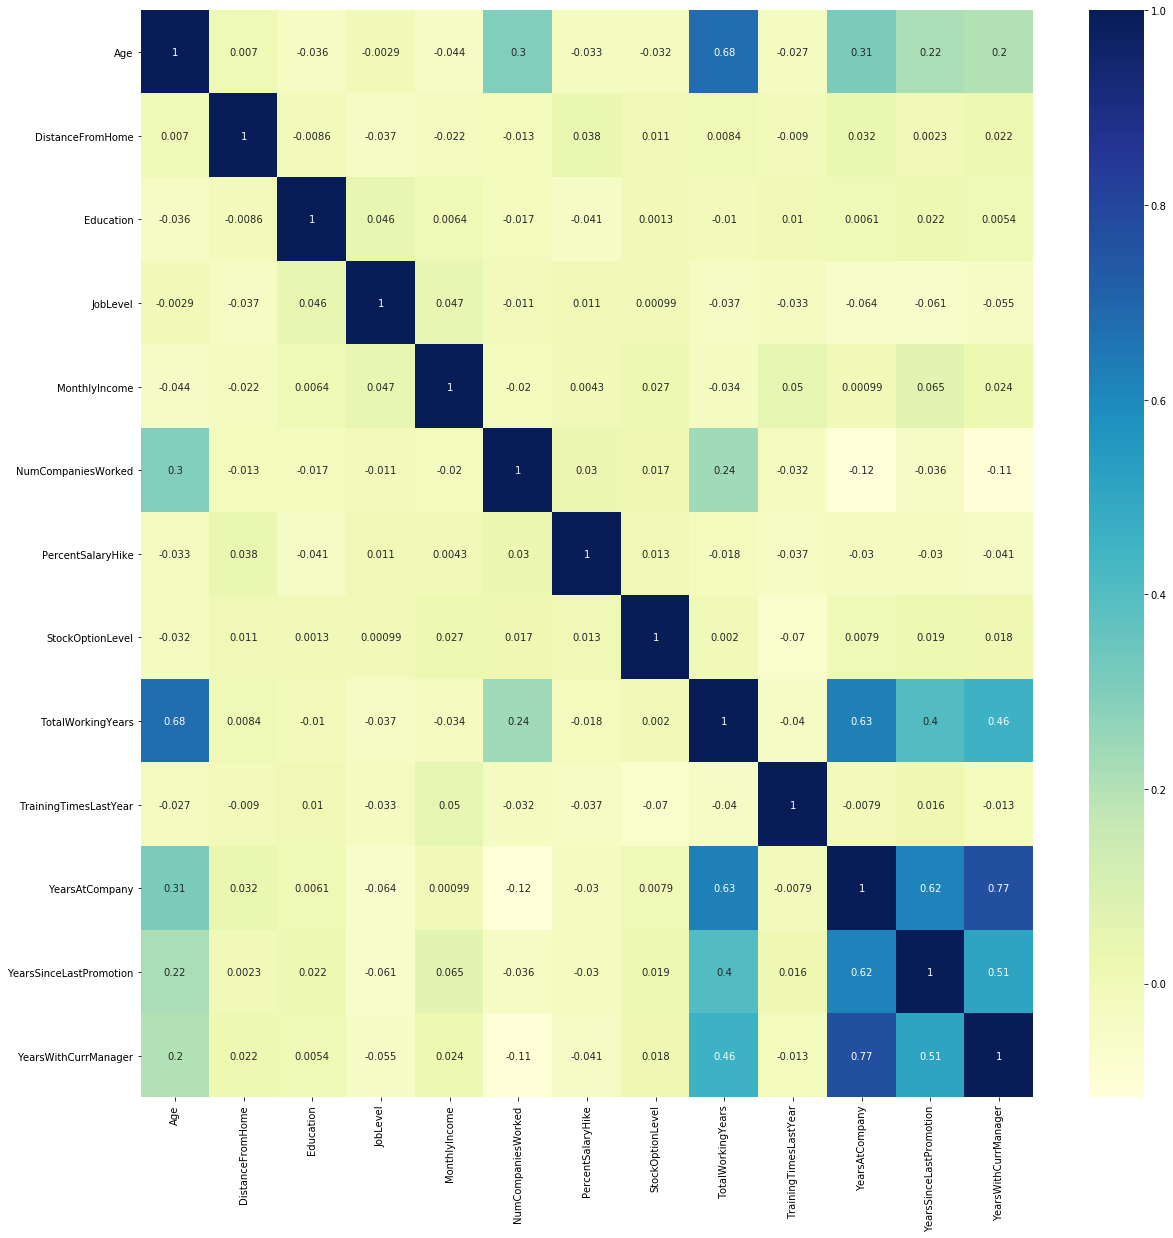

In [19]:
plt.figure(figsize=(20,20))
corr=numd.corr()
sns.heatmap(corr,annot=True,cmap='YlGnBu')

In [20]:
catd.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18
0,No,Travel_Rarely,Sales,Life Sciences,Female,Healthcare Representative,Married,Y
1,Yes,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Single,Y
2,No,Travel_Frequently,Research & Development,Other,Male,Sales Executive,Married,Y
3,No,Non-Travel,Research & Development,Life Sciences,Male,Human Resources,Married,Y
4,No,Travel_Rarely,Research & Development,Medical,Male,Sales Executive,Single,Y


In [21]:
print(len(catd['Attrition']))
print(len(catd[catd['Attrition']=='Yes']))
print(len(catd[catd['Attrition']=='No']))
print('the yes percentage:',len(catd[catd['Attrition']=='Yes'])/len(catd['Attrition'])*100,'%')
print('the yes percentage:',len(catd[catd['Attrition']=='No'])/len(catd['Attrition'])*100,'%')

4410
711
3699
the yes percentage: 16.122448979591837 %
the yes percentage: 83.87755102040816 %


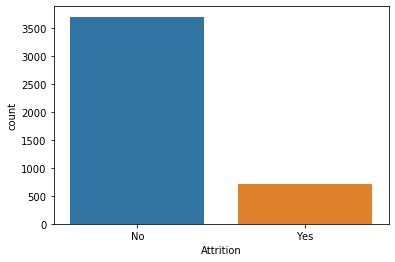

In [22]:
sns.countplot(x='Attrition',data=catd)

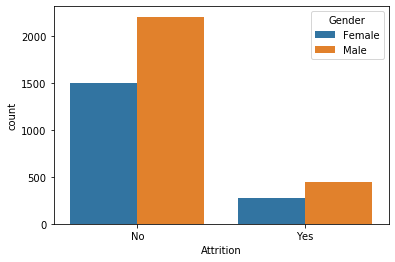

In [23]:
sns.countplot(x='Attrition',data=catd,hue='Gender')

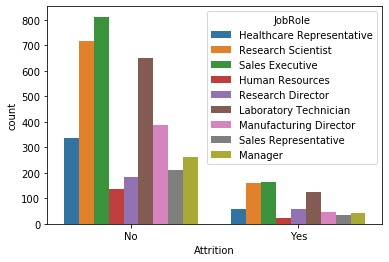

In [24]:
sns.countplot(x='Attrition',data=catd,hue='JobRole')

In [25]:
d['Age'].unique()

array([51, 31, 32, 38, 46, 28, 29, 25, 45, 36, 55, 47, 37, 21, 35, 26, 50,
       53, 42, 44, 49, 18, 41, 39, 58, 33, 43, 52, 27, 30, 54, 40, 23, 48,
       57, 34, 24, 22, 56, 60, 19, 20, 59], dtype=int64)

In [26]:
def Age(df):
    df.loc[df['Age']<=30,'Age']=1
    df.loc[(df['Age']>30)&(df['Age']<=40),'Age']=2
    df.loc[(df['Age']>40)&(df['Age']<=50),'Age']=3
    df.loc[(df['Age']>50)&(df['Age']<=60),'Age']=4
    return df
Age(d)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,4,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,...,131160,1.0,Y,11,0,1.0,6,1,0,0
1,2,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,...,41890,0.0,Y,23,1,6.0,3,5,1,4
2,2,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,...,193280,1.0,Y,15,3,5.0,2,5,0,3
3,2,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,...,83210,3.0,Y,11,3,13.0,5,8,7,5
4,2,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,...,23420,4.0,Y,12,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,3,No,Travel_Rarely,Research & Development,5,4,Medical,Female,1,Research Scientist,...,60290,3.0,Y,17,1,10.0,5,3,0,2
4406,1,No,Travel_Rarely,Research & Development,2,4,Medical,Male,1,Laboratory Technician,...,26790,2.0,Y,15,0,10.0,2,3,0,2
4407,1,No,Travel_Rarely,Research & Development,25,2,Life Sciences,Male,2,Sales Executive,...,37020,0.0,Y,20,0,5.0,4,4,1,2
4408,3,No,Travel_Rarely,Sales,18,2,Medical,Male,1,Laboratory Technician,...,23980,0.0,Y,14,1,10.0,2,9,7,8


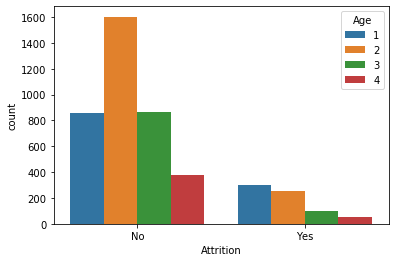

In [27]:
sns.countplot(x='Attrition',data=d,hue='Age')

In [28]:
catd.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18
0,No,Travel_Rarely,Sales,Life Sciences,Female,Healthcare Representative,Married,Y
1,Yes,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Single,Y
2,No,Travel_Frequently,Research & Development,Other,Male,Sales Executive,Married,Y
3,No,Non-Travel,Research & Development,Life Sciences,Male,Human Resources,Married,Y
4,No,Travel_Rarely,Research & Development,Medical,Male,Sales Executive,Single,Y


In [29]:
print(d['BusinessTravel'].unique())
print(d['Department'].unique())
print(d['EducationField'].unique())
print(d['JobRole'].unique())
print(d['MaritalStatus'].unique())
print(d['Over18'].unique())

['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
['Sales' 'Research & Development' 'Human Resources']
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
['Healthcare Representative' 'Research Scientist' 'Sales Executive'
 'Human Resources' 'Research Director' 'Laboratory Technician'
 'Manufacturing Director' 'Sales Representative' 'Manager']
['Married' 'Single' 'Divorced']
['Y']


In [30]:
le=LabelEncoder()

In [31]:
d['BusinessTravel']=le.fit_transform(d['BusinessTravel'])
d['Department']=le.fit_transform(d['Department'])
d['EducationField']=le.fit_transform(d['EducationField'])
d['JobRole']=le.fit_transform(d['JobRole'])
d['MaritalStatus']=le.fit_transform(d['MaritalStatus'])
d['Over18']=le.fit_transform(d['Over18'])
d['Attrition']=le.fit_transform(d['Attrition'])
d['Gender']=le.fit_transform(d['Gender'])

In [32]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 21 columns):
Age                        4410 non-null int64
Attrition                  4410 non-null int32
BusinessTravel             4410 non-null int32
Department                 4410 non-null int32
DistanceFromHome           4410 non-null int64
Education                  4410 non-null int64
EducationField             4410 non-null int32
Gender                     4410 non-null int32
JobLevel                   4410 non-null int64
JobRole                    4410 non-null int32
MaritalStatus              4410 non-null int32
MonthlyIncome              4410 non-null int64
NumCompaniesWorked         4410 non-null float64
Over18                     4410 non-null int32
PercentSalaryHike          4410 non-null int64
StockOptionLevel           4410 non-null int64
TotalWorkingYears          4410 non-null float64
TrainingTimesLastYear      4410 non-null int64
YearsAtCompany             4410 non-null in

In [33]:
d.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,4,0,2,2,6,2,1,0,1,0,...,131160,1.0,0,11,0,1.0,6,1,0,0
1,2,1,1,1,10,1,1,0,1,6,...,41890,0.0,0,23,1,6.0,3,5,1,4
2,2,0,1,1,17,4,4,1,4,7,...,193280,1.0,0,15,3,5.0,2,5,0,3
3,2,0,0,1,2,5,1,1,3,1,...,83210,3.0,0,11,3,13.0,5,8,7,5
4,2,0,2,1,10,1,3,1,1,7,...,23420,4.0,0,12,2,9.0,2,6,0,4


In [34]:
d1=d.drop('Over18',axis=1)
corr=d1.corr()

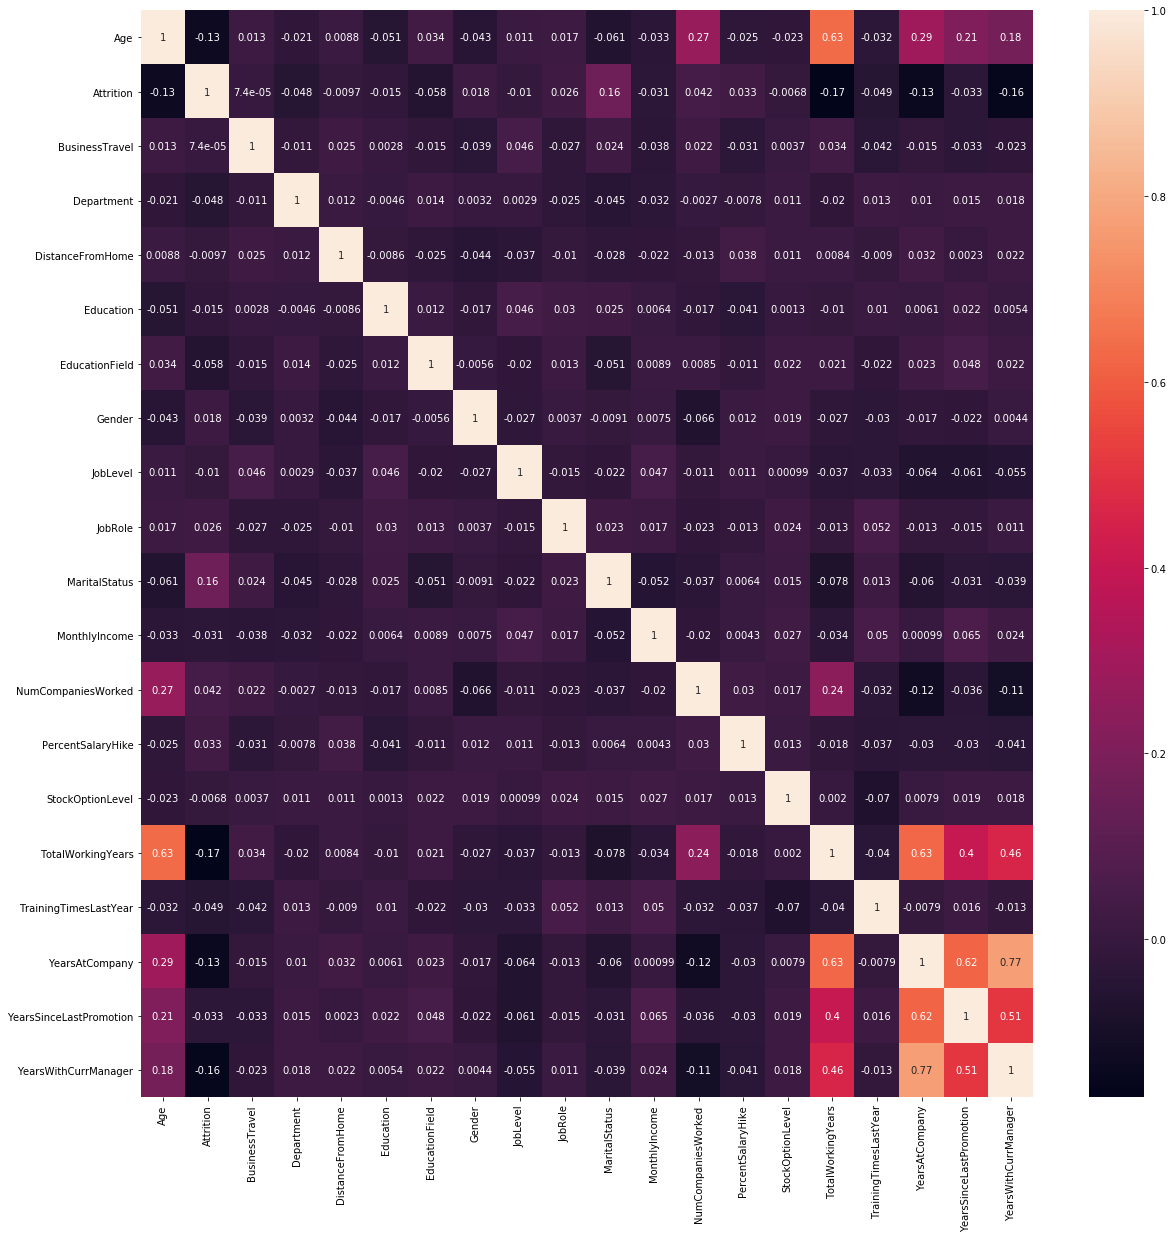

In [35]:
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True)

In [36]:
target=d['Attrition']

In [37]:
d=d.drop('Attrition',axis=1)

In [38]:
d.isnull().sum()

Age                        0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

In [39]:
x_train,x_test,y_train,y_test=train_test_split(d,target,test_size=.30,random_state=0)

In [40]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3087, 20)
(3087,)
(1323, 20)
(1323,)


In [41]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [42]:
lr=LogisticRegression()

In [43]:
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
y_pred=lr.predict(x_test)
y_pred.shape

(1323,)

In [269]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1127
           1       0.57      0.04      0.08       196

    accuracy                           0.85      1323
   macro avg       0.71      0.52      0.50      1323
weighted avg       0.81      0.85      0.80      1323



In [270]:
print(confusion_matrix(y_test,y_pred))

[[1121    6]
 [ 188    8]]
